In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [108]:
def redistribute_force(F, L, alpha, F_thr, neighborhood='moore'):
    # Create a copy of the forces to store the new values
    F_new = np.copy(F)
    # List of active sites
    active_sites = []

    # Find active sites
    for i in range(L):
        for j in range(L):
            if F[i, j] >= F_thr:
                active_sites.append((i, j))

    # Redistribute forces from active sites
    for site in active_sites:
        i, j = site
        force_to_redistribute = F[i, j]

        # Define the neighborhood for force redistribution
        if neighborhood == 'moore':
            neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1),
                         (i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)]
        else:  # von Neumann neighborhood
            neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]

        # count no of neighbors 
        neighbors_count = 0    
        for n in neighbors:
            ni, nj = n
            if 0 <= ni < L and 0 <= nj < L:
                neighbors_count += 1
        
        # Redistribute the force to the neighbors
        for n in neighbors:
            ni, nj = n
            if 0 <= ni < L and 0 <= nj < L:
                F_new[ni, nj] += (alpha * force_to_redistribute)/neighbors_count

        # Set the force of the active site to zero
        F_new[i, j] = 1

    return F_new, active_sites

def simulate_ca(L, alpha, F_thr, n_additions, neighborhood='moore'):
    # Initialize the grid with random forces
    F = np.random.rand(L, L)
    initial_state = np.copy(F)

    active = True
    active_sites_count = 0
    active_sites_array = []
    while active:
        # Redistribute forces and get list of active sites
        F, active_sites = redistribute_force(F, L, alpha, F_thr, neighborhood)
        # If there are no active sites, break the loop
        active = len(active_sites) > 0
        active_sites_count += len(active_sites)

        if not active and n_additions > 0:
            # Locate site with the block closest to slip
            i, j = np.unravel_index(np.argmin(F_thr - F), F.shape)
            # Add the difference to all sites
            F += (F_thr - F[i, j])
            n_additions -= 1
            active_sites_array.append(active_sites_count)
            active_sites_count = 0
            active = True

    return initial_state, F, active_sites_array

def visualize_states(initial_state, final_state, title='Cellular Automata States'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Initial state visualization
    ax1 = axes[0]
    im1 = ax1.imshow(initial_state, cmap='viridis', interpolation='nearest')
    ax1.set_title('Initial State')
    fig.colorbar(im1, ax=ax1, orientation='vertical')

    # Final state visualization
    ax2 = axes[1]
    im2 = ax2.imshow(final_state, cmap='viridis', interpolation='nearest')
    ax2.set_title('Final State')
    fig.colorbar(im2, ax=ax2, orientation='vertical')

    # Overall title and show
    plt.suptitle(title)
    plt.show()


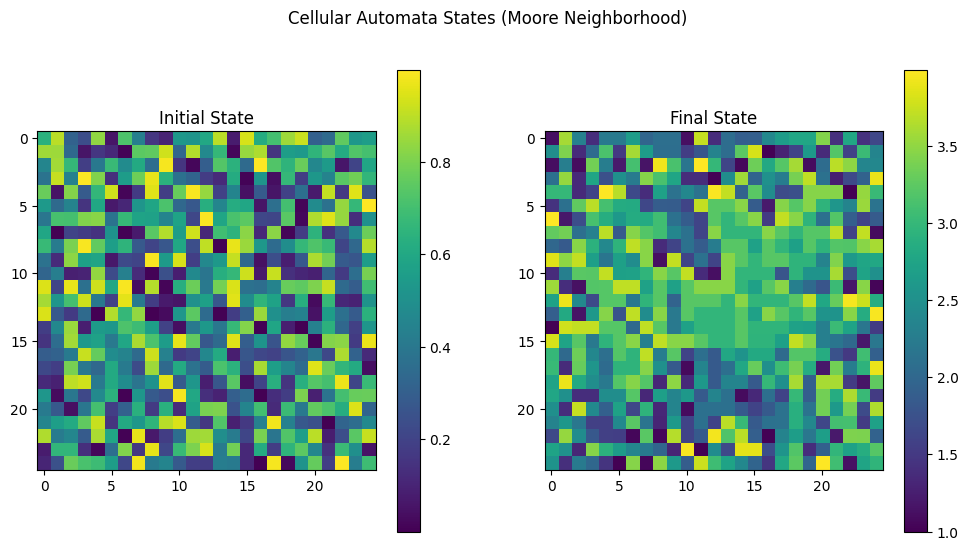

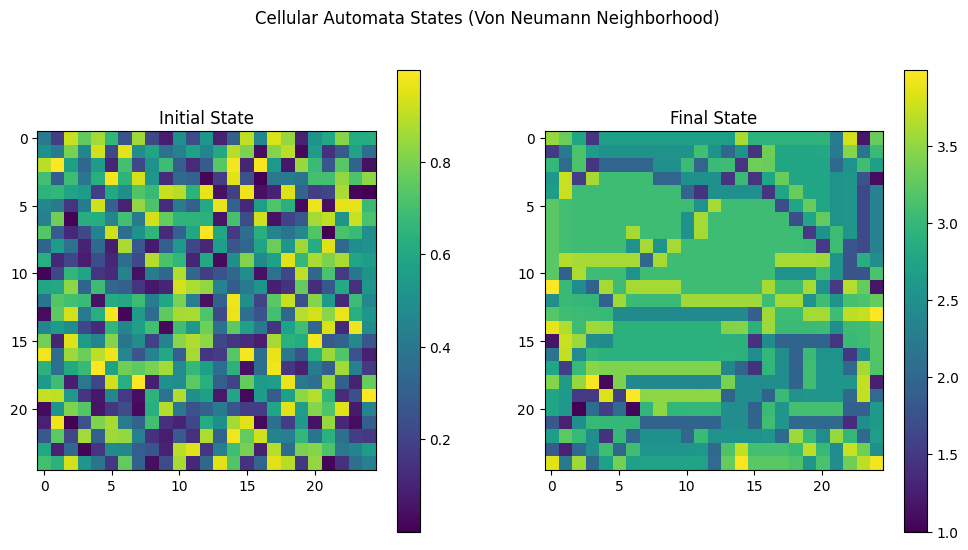

In [109]:
# Parameters
L = 25  # Size of the lattice
alpha = 0.5  # Coupling constant
F_thr = 4.0  # Threshold force
n_additions = 10000 # Number of additions of force to the system

# Run the simulation for Moore neighborhood
initial_state_moore, final_state_moore, active_sites_moore = simulate_ca(L, alpha, F_thr, n_additions, neighborhood='moore')

# Visualize the initial and final states for Moore neighborhood
#visualize_states(initial_state_moore, final_state_moore, title='Cellular Automata States (Moore Neighborhood)')

# Run the simulation for Von Neumann neighborhood
initial_state_von, final_state_von, active_sites_von = simulate_ca(L, alpha, F_thr, n_additions, neighborhood='von_neumann')

# Visualize the initial and final states for Von Neumann neighborhood
#visualize_states(initial_state_von, final_state_von, title='Cellular Automata States (Von Neumann Neighborhood)')

In [119]:
n_simulations = 25
active_sites_moore_array = []
for i in range(n_simulations):
    print(i)
    _, _, active_sites_moore = simulate_ca(L, alpha, F_thr, n_additions, neighborhood='moore')
    active_sites_moore_array.append(active_sites_moore)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


250000
Counter({1: 159787, 2: 38601, 3: 17353, 4: 9275, 5: 5525, 6: 3809, 7: 2835, 8: 1947, 9: 1396, 10: 1176, 11: 896, 12: 796, 13: 621, 14: 549, 15: 408, 17: 355, 16: 351, 19: 308, 18: 287, 20: 284, 21: 206, 23: 197, 22: 188, 24: 170, 27: 126, 25: 123, 30: 123, 26: 109, 31: 104, 28: 95, 32: 86, 33: 84, 29: 70, 34: 68, 35: 62, 50: 56, 36: 55, 39: 53, 37: 45, 38: 40, 40: 38, 41: 36, 49: 36, 42: 36, 43: 35, 44: 32, 46: 30, 55: 30, 51: 29, 45: 28, 53: 27, 59: 27, 0: 25, 54: 24, 58: 23, 47: 23, 66: 23, 625: 22, 61: 21, 64: 20, 65: 20, 67: 19, 56: 19, 57: 19, 52: 19, 63: 19, 69: 17, 62: 16, 48: 16, 71: 15, 83: 15, 77: 15, 92: 13, 80: 13, 70: 13, 60: 13, 78: 12, 73: 11, 76: 11, 68: 10, 72: 10, 74: 10, 86: 9, 87: 9, 93: 9, 81: 9, 89: 9, 96: 8, 79: 8, 115: 8, 75: 8, 99: 8, 123: 7, 98: 7, 94: 7, 117: 7, 88: 7, 102: 7, 82: 6, 100: 6, 161: 6, 95: 6, 110: 5, 109: 5, 113: 5, 108: 5, 101: 5, 107: 5, 119: 5, 127: 5, 216: 5, 112: 4, 132: 4, 125: 4, 190: 4, 137: 4, 202: 4, 140: 4, 165: 4, 135: 4, 154:

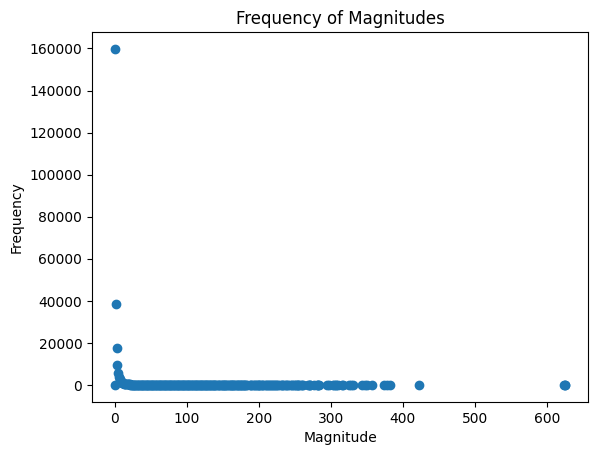

In [140]:
flattened_list = [item for sublist in active_sites_moore_array for item in sublist]
print(len(flattened_list))
occurrences_counter = Counter(flattened_list)
sorted_data = dict(sorted(occurrences_counter.items()))

magnitudes = list(occurrences_counter.keys())
frequencies = list(occurrences_counter.values())

plt.scatter(magnitudes, frequencies)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Frequency of Magnitudes')
plt.show()


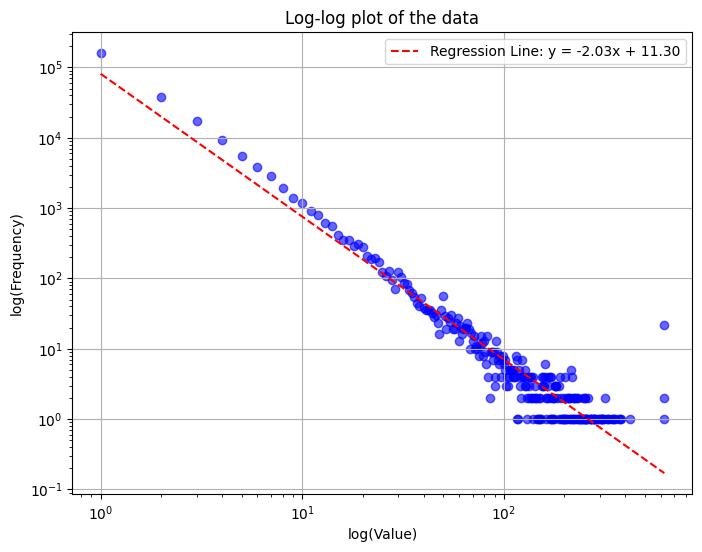

Slope: -2.0303840410247993
Intercept: 11.304881141297844
R-squared: 0.9222983101178136
P-value: 1.0544847329000336e-145


In [141]:
from scipy.stats import linregress
from math import e

values = np.array(list(occurrences_counter.keys()))
frequencies = np.array(list(occurrences_counter.values()))

non_zero_indices = values > 0
values = values[non_zero_indices]
frequencies = frequencies[non_zero_indices]

slope, intercept, r_value, p_value, std_err = linregress(np.log(values), np.log(frequencies))

plt.figure(figsize=(8, 6))
plt.scatter(values, frequencies, color='blue', alpha=0.6)
plt.xlabel('log(Value)')
plt.ylabel('log(Frequency)')
plt.xscale('log')
plt.yscale('log')
plt.title('Log-log plot of the data')

x = np.linspace(min(np.log(values)), max(np.log(values)), 100)
y = slope * x + intercept
plt.plot(e ** x,e ** y, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.legend()

plt.grid(True)
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)